In [1]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv('train.csv')

In [14]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
#Data Cleaning

In [16]:
df.shape

(5574, 2)

In [17]:
df.isnull().sum()

sms      0
label    0
dtype: int64

In [21]:
df.rename(columns={'sms':'text','label':'target'},inplace=True)

In [22]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [23]:
df.duplicated().sum()

403

In [24]:
#Remove duplicate

In [27]:
df = df.drop_duplicates(keep='first')

In [28]:
df.duplicated().sum()

0

In [29]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [30]:
df.shape

(5171, 2)

In [31]:
#Data Analisys

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

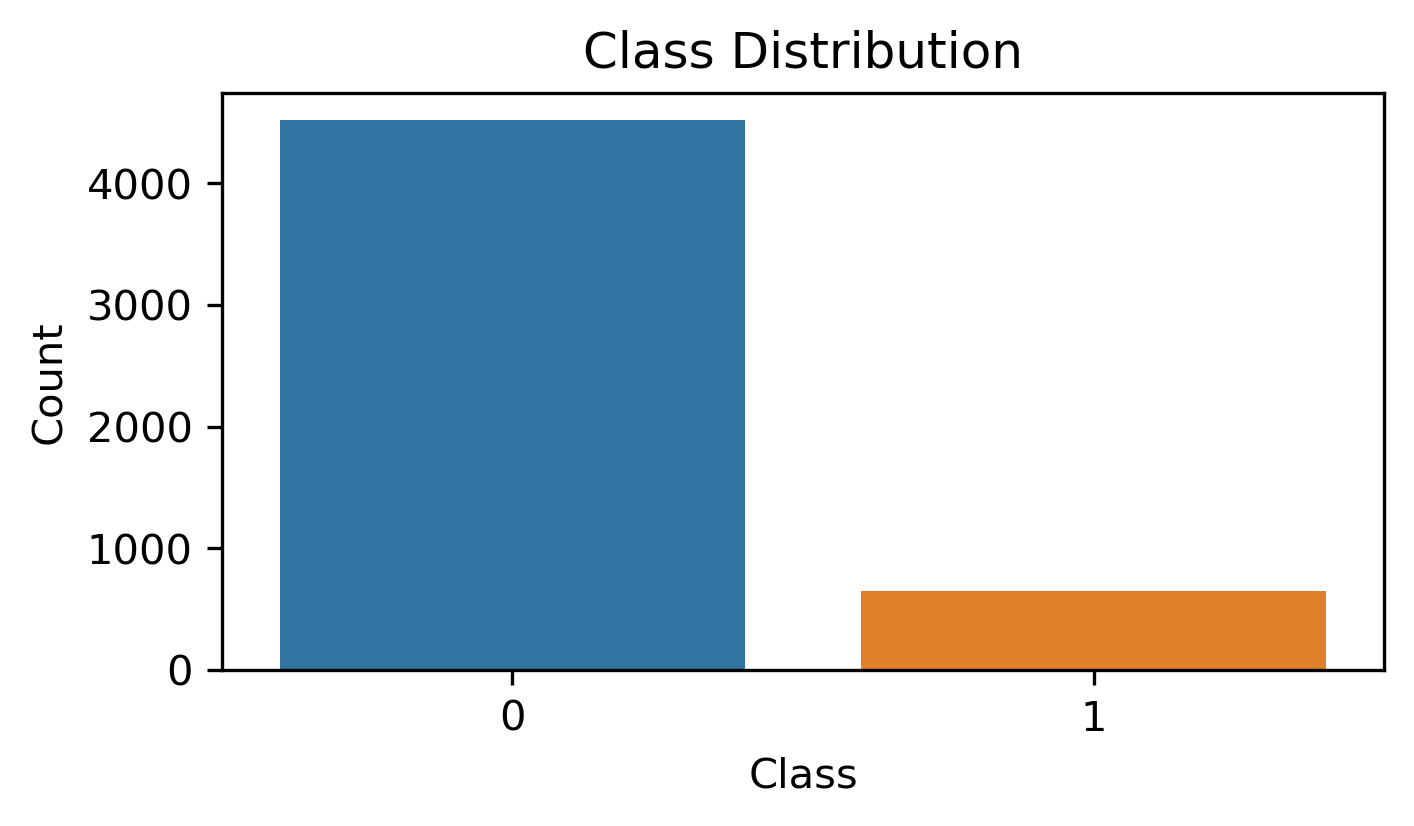

In [40]:
plt.figure(figsize=(5, 2.5), dpi=300)
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

In [41]:
import nltk

In [ ]:
nltk.d